Si_Ws_300K

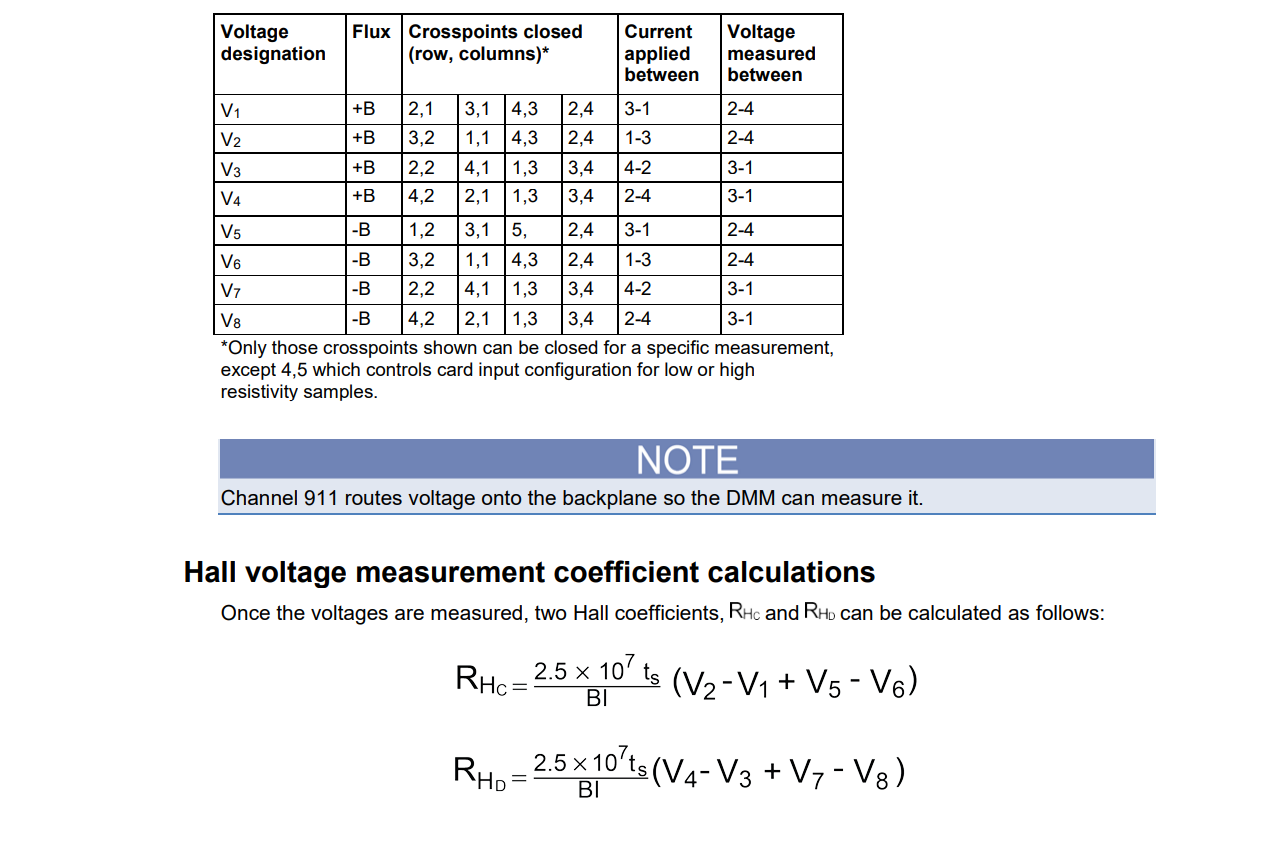

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [28]:
filename='C:\\Users\\Admin\\Desktop\\Data\\Si_Ws\\Si_Ws\\Si_Ws_100K.csv'
df = pd.read_csv(filename, names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00001,60000.58652,300.001849,-0.001740,-0.029957,0.001013,0.001012,0.000185,1
1,0.00001,59000.44766,300.001460,-0.001709,-0.026773,-0.000899,0.000465,0.000199,1
2,0.00001,58000.55273,300.001335,-0.001682,-0.033269,-0.000066,0.000284,0.000195,1
3,0.00001,57000.58613,300.001364,-0.001649,-0.038265,-0.001178,0.000275,0.000213,1
4,0.00001,56000.32559,300.000456,-0.001652,-0.033004,-0.002754,-0.000343,0.000204,1
...,...,...,...,...,...,...,...,...,...
237,0.00001,56000.48125,300.000557,-0.001663,-0.020866,0.004751,0.002689,0.000172,1
238,0.00001,57000.30410,300.000784,-0.001682,-0.019864,0.004504,0.002757,0.000186,1
239,0.00001,58000.15332,300.000806,-0.001748,-0.019230,0.004622,0.002733,0.000183,1
240,0.00001,59000.36172,300.000736,-0.001759,-0.021375,0.004724,0.002773,0.000181,1


### Converting B to integer B

In [8]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B', 'B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [9]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00001,60000.586523,60000,300.001849,-0.001740,-0.029957,0.001013,0.001012,0.000185,1.0
1,0.00001,59000.447656,59000,300.001460,-0.001709,-0.026773,-0.000899,0.000465,0.000199,1.0
2,0.00001,58000.552734,58000,300.001335,-0.001682,-0.033269,-0.000066,0.000284,0.000195,1.0
3,0.00001,57000.586133,57000,300.001364,-0.001649,-0.038265,-0.001178,0.000275,0.000213,1.0
4,0.00001,56000.325586,56000,300.000456,-0.001652,-0.033004,-0.002754,-0.000343,0.000204,1.0


In [10]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

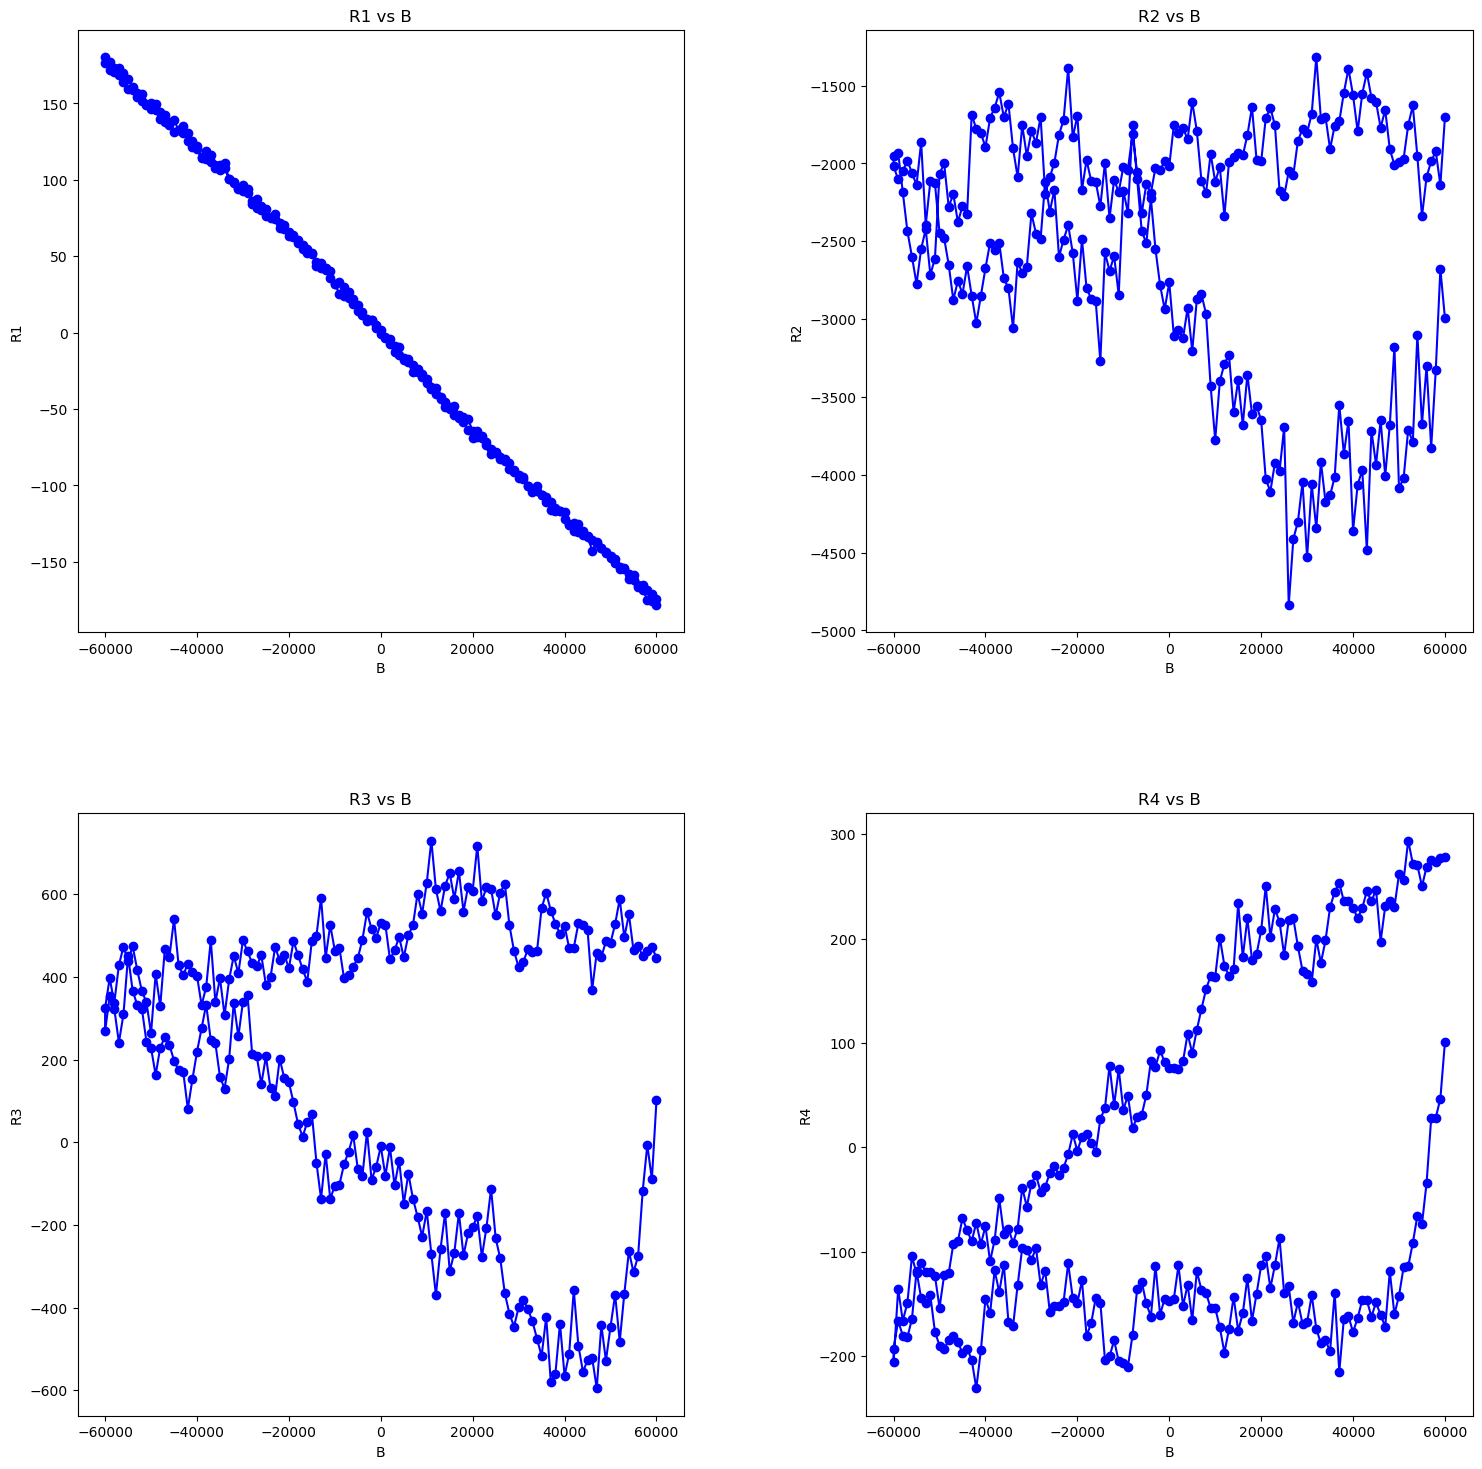

In [11]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [263]:
# B_max = max(df['B_int'])
# B_max_first_idx = 0
# for i in range(len(df)):
#     if df.iloc[i].B_int == B_max:
#         B_max_first_idx = i
#         break
# B_max_first_idx

25

In [264]:
# df = df.iloc[B_max_first_idx+1:].copy()
# df.reset_index(inplace = True, drop = True) # resetting index

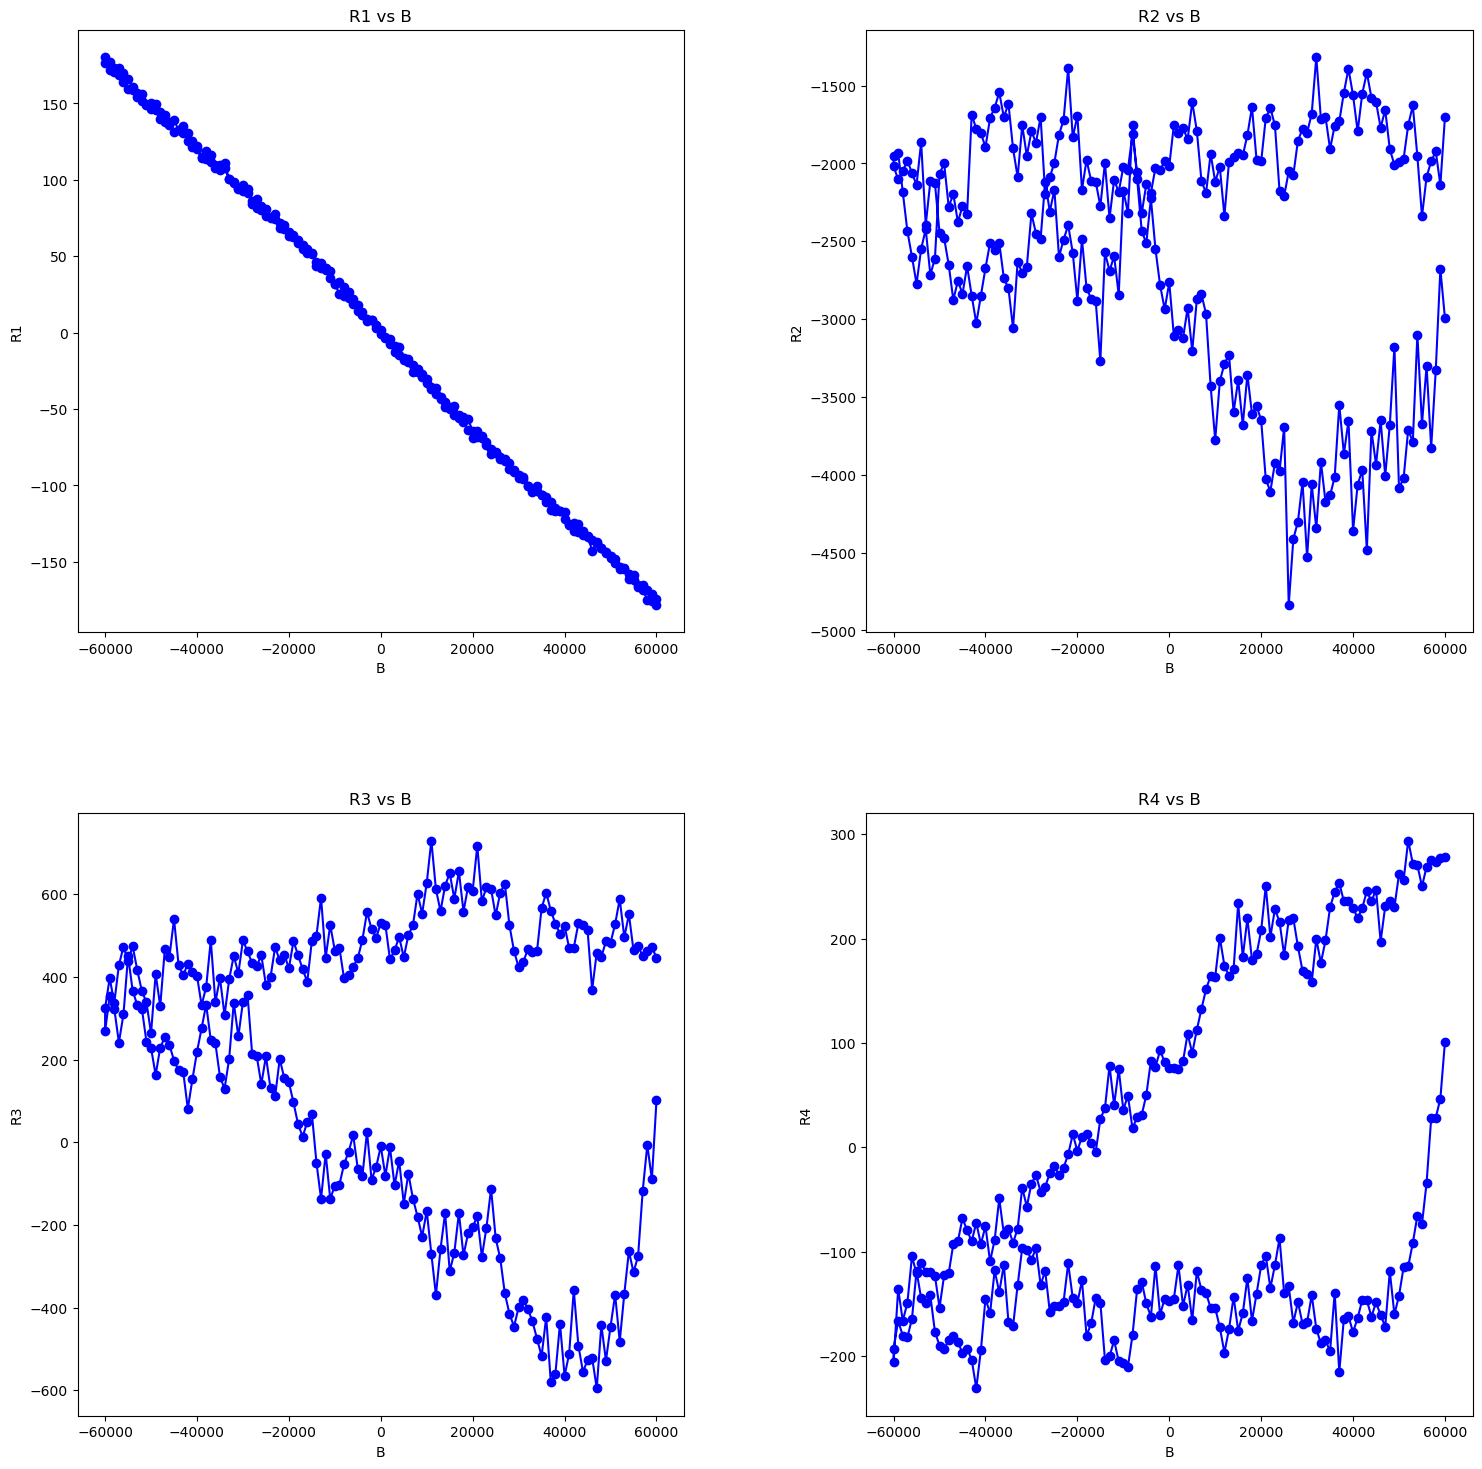

In [12]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [13]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

60000 -60000


In [14]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

120

In [15]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [16]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00001,60000.586523,60000,300.001849,-0.001740,-0.029957,0.001013,0.001012,0.000185,1.0
1,0.00001,59000.447656,59000,300.001460,-0.001709,-0.026773,-0.000899,0.000465,0.000199,1.0
2,0.00001,58000.552734,58000,300.001335,-0.001682,-0.033269,-0.000066,0.000284,0.000195,1.0
3,0.00001,57000.586133,57000,300.001364,-0.001649,-0.038265,-0.001178,0.000275,0.000213,1.0
4,0.00001,56000.325586,56000,300.000456,-0.001652,-0.033004,-0.002754,-0.000343,0.000204,1.0


In [17]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
121,0.00001,-60000.062695,-60000,300.001213,0.001803,-0.019526,0.003248,-0.002060,0.000186,1.0
122,0.00001,-59000.245117,-59000,300.000925,0.001771,-0.019322,0.003977,-0.001358,0.000172,1.0
123,0.00001,-58000.617969,-58000,300.001308,0.001703,-0.021838,0.003372,-0.001664,0.000172,1.0
124,0.00001,-57000.255859,-57000,300.001392,0.001732,-0.024336,0.004285,-0.001495,0.000182,1.0
125,0.00001,-56000.359961,-56000,300.001123,0.001640,-0.025989,0.004735,-0.001047,0.000181,1.0


In [18]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [19]:
data = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data = data[data['B_int_x'] == -1*data['B_int_y']] # selecting 
data = data[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data.reset_index(inplace = True, drop = True) # resetting index
data.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00001,60000,300.001849,-0.001740,-0.029957,0.001013,0.001012,0.001803,-0.019526,0.003248,-0.002060,1.0
1,0.00001,59000,300.001460,-0.001709,-0.026773,-0.000899,0.000465,0.001771,-0.019322,0.003977,-0.001358,1.0
2,0.00001,58000,300.001335,-0.001682,-0.033269,-0.000066,0.000284,0.001703,-0.021838,0.003372,-0.001664,1.0
3,0.00001,57000,300.001364,-0.001649,-0.038265,-0.001178,0.000275,0.001732,-0.024336,0.004285,-0.001495,1.0
4,0.00001,56000,300.000456,-0.001652,-0.033004,-0.002754,-0.000343,0.001640,-0.025989,0.004735,-0.001047,1.0


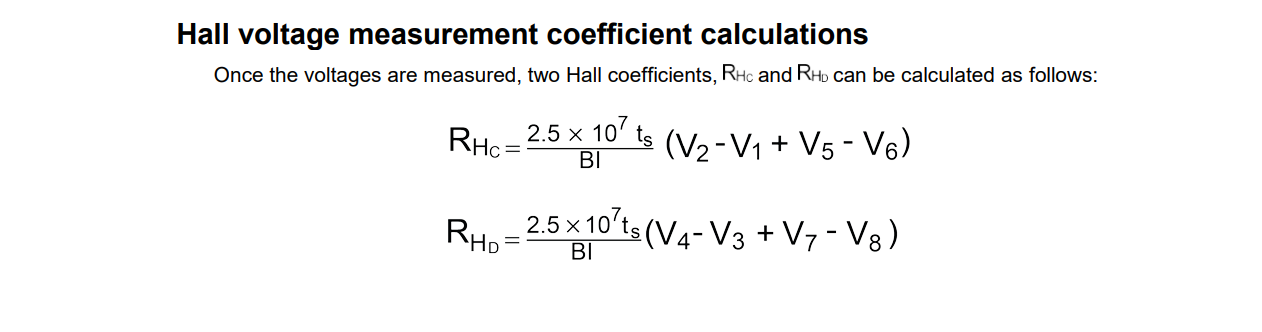
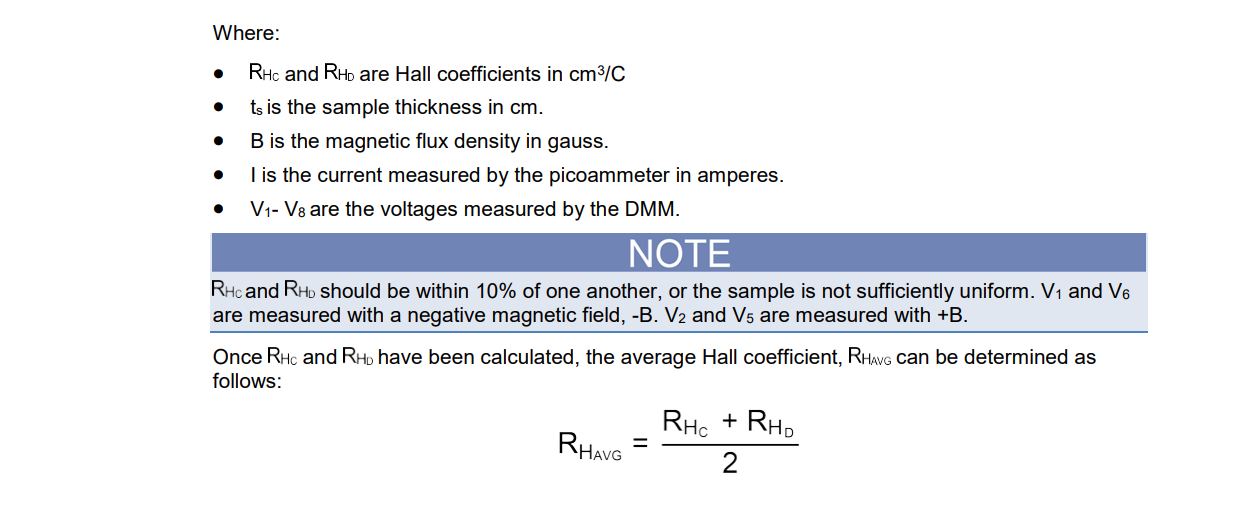

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [20]:
data['RHc'] = (data['V2'] - data['V1'] + data['V5'] - data['V6'])/(data['I']*data['multiplier'])
data['RHd'] = (data['V4'] - data['V3'] + data['V7'] - data['V8'])/(data['I']*data['multiplier'])
data['R'] = (data['RHc'] + data['RHd'])/2

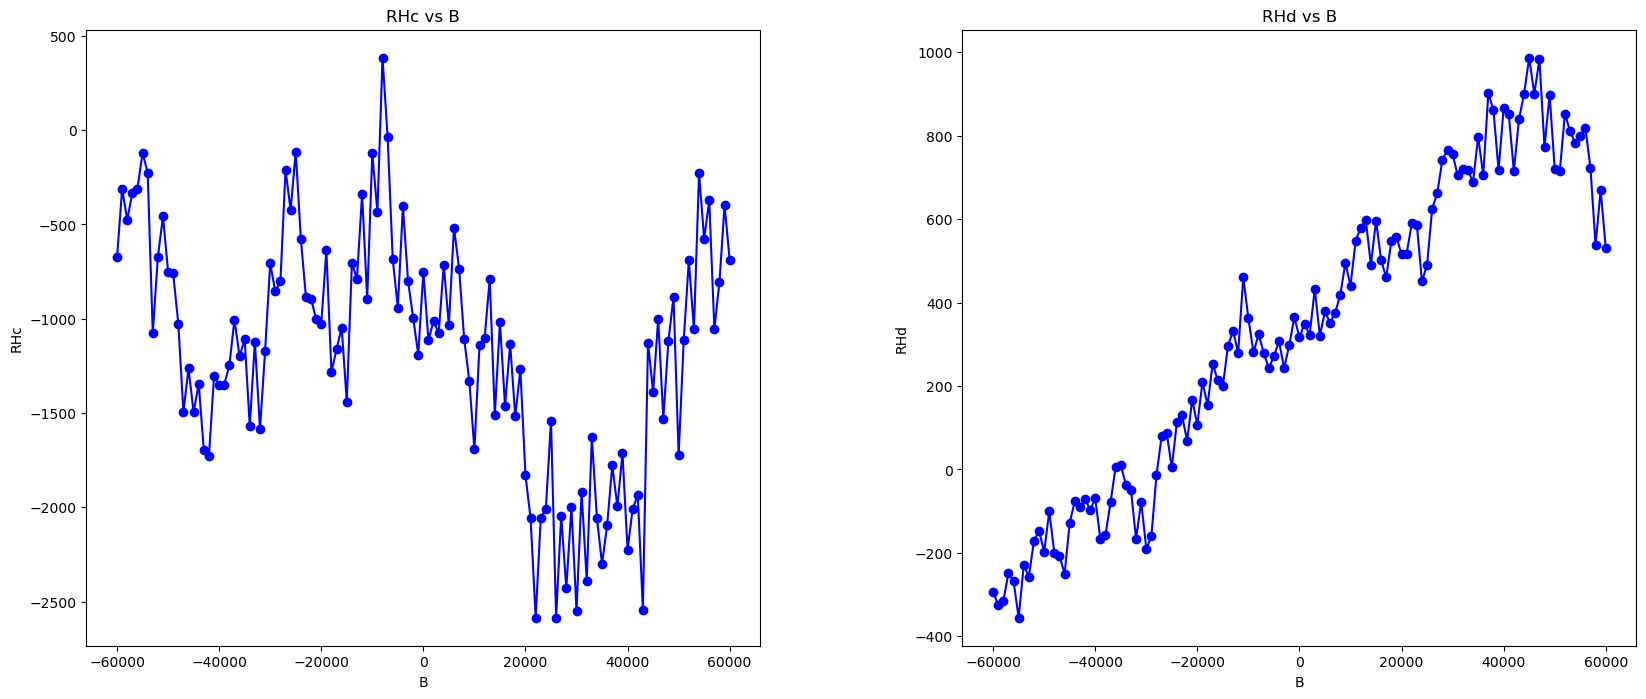

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data['B'],data['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data['B'],data['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

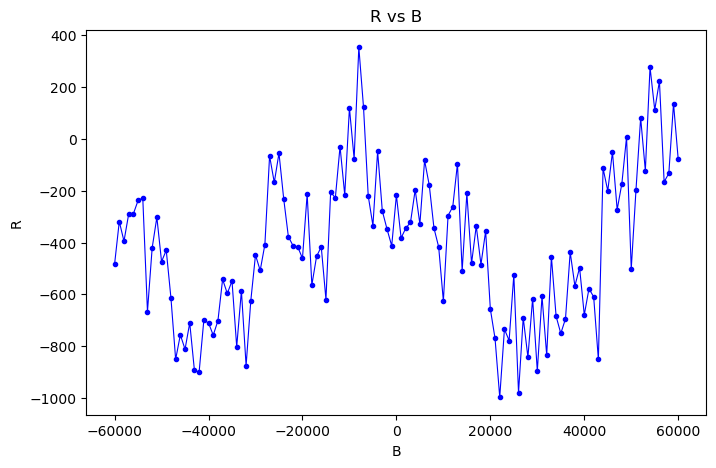

In [22]:
plt.figure(figsize=(8,5))
plt.plot(data['B'],data['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [23]:
data2 = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data2 = data2[data2['B_int_x'] == -1*data2['B_int_y']] # selecting 
data2 = data2[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data2.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data2.reset_index(inplace = True, drop = True) # resetting index
data2.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00001,-60000,300.001213,0.001803,-0.019526,0.003248,-0.002060,-0.001740,-0.029957,0.001013,0.001012,1.0
1,0.00001,-59000,300.000925,0.001771,-0.019322,0.003977,-0.001358,-0.001709,-0.026773,-0.000899,0.000465,1.0
2,0.00001,-58000,300.001308,0.001703,-0.021838,0.003372,-0.001664,-0.001682,-0.033269,-0.000066,0.000284,1.0
3,0.00001,-57000,300.001392,0.001732,-0.024336,0.004285,-0.001495,-0.001649,-0.038265,-0.001178,0.000275,1.0
4,0.00001,-56000,300.001123,0.001640,-0.025989,0.004735,-0.001047,-0.001652,-0.033004,-0.002754,-0.000343,1.0


### Hall resistance calculation

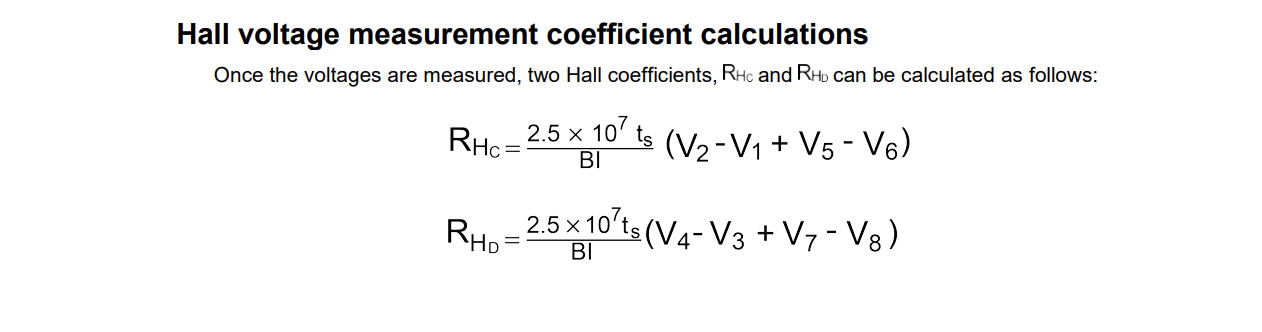

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [24]:
data2['RHc'] = (data2['V2'] - data2['V1'] + data2['V5'] - data2['V6'])/(data2['I']*data2['multiplier'])
data2['RHd'] = (data2['V4'] - data2['V3'] + data2['V7'] - data2['V8'])/(data2['I']*data2['multiplier'])

data2['R'] = (data2['RHc'] + data2['RHd'])/2

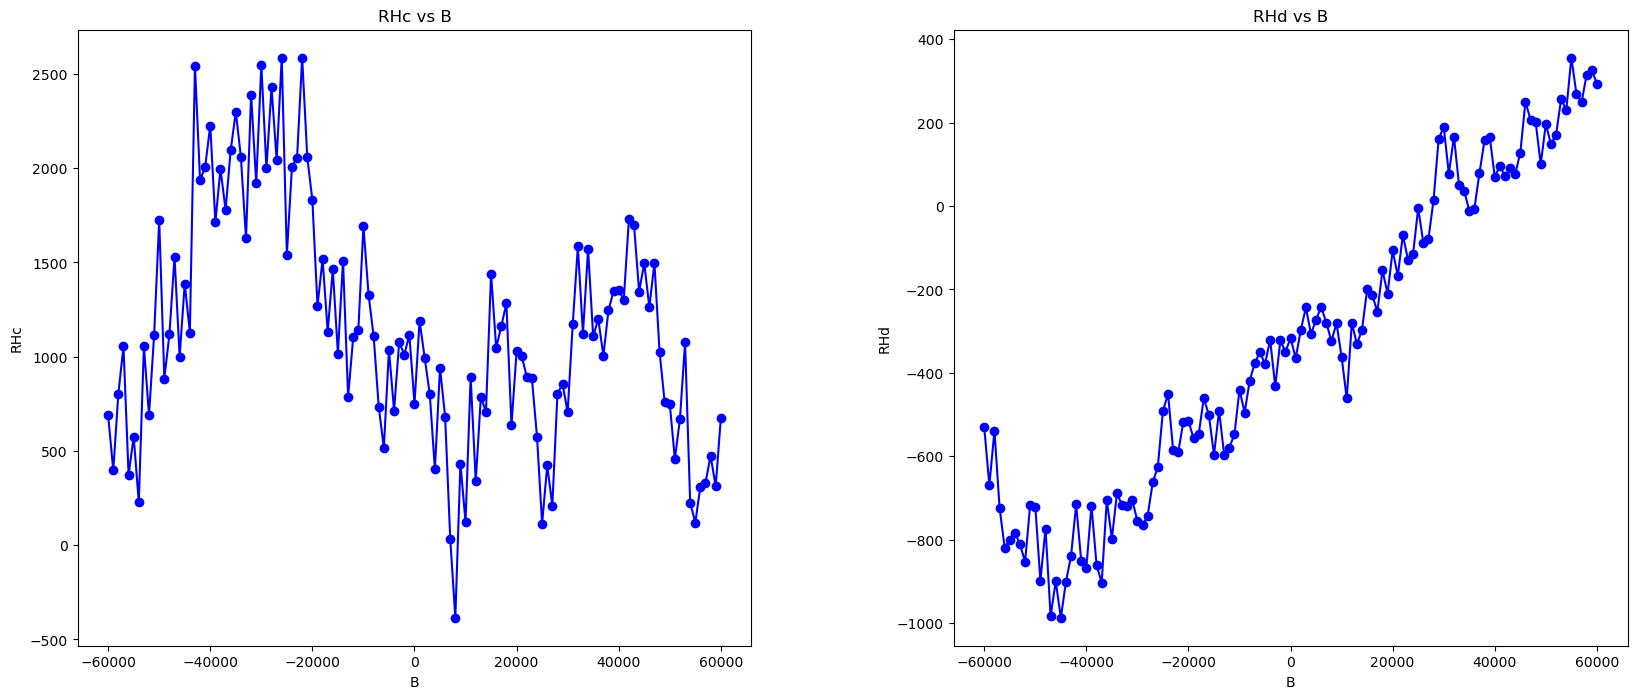

In [25]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data2['B'],data2['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data2['B'],data2['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

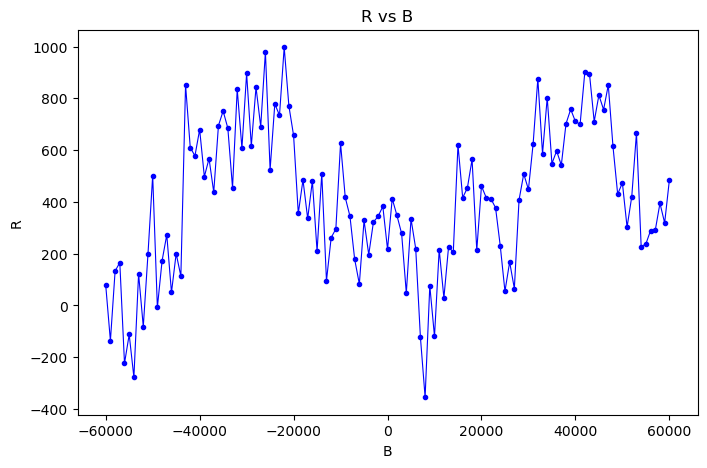

In [26]:
plt.figure(figsize=(8,5))
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

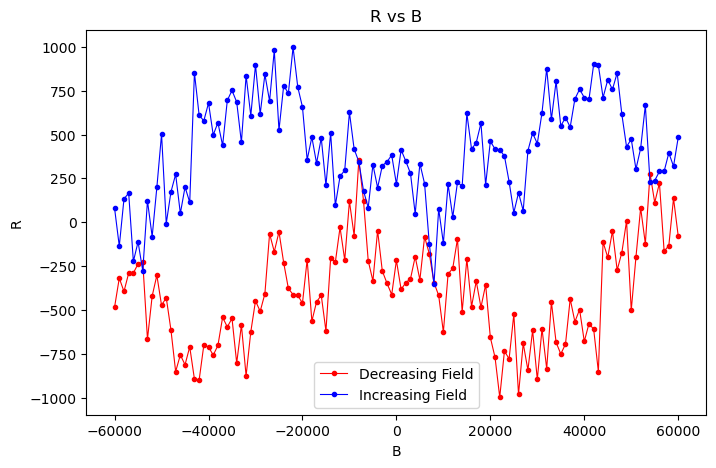

In [27]:
plt.figure(figsize=(8,5))
plt.plot(data['B'], data['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data2['B'],data2['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()